In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelling tax and benefit systems

Some intro here

## The Data

For this exercise we will use a publicly available subset of the UK Living Costs and Food Survey (2005-6). It has been pushed through [**synthpop**](https://synthpop.org.uk/), a tool to create fake but realistic-looking data.

The LCF data is loaded  into a DataFrame (a spreadsheet-like structure)

In [97]:
url = "https://virtual-worlds.scot/ou/uk-lcf-subset-2005-6.csv"
storage_options = {'User-Agent': 'Mozilla/9.0'}

lcf = pd.read_csv(url,storage_options=storage_options)
#print(lcf.info) 

## The tax and benefit system

We begin by defining a very simple tax and benefit system (**tbsys**). This system:

- taxes income at a single rate of 50%
- gives everyone a tax-free allowance of £1,000 per year
- has a single benefit of £100 per child per week

In [99]:
n = lcf.shape[0] #the number of rows, i.e. of houselholds, in the table
#print(n)
allow = 1000/52
rate = 50/100.0
ben = 100
weight = 26_000_000/n #26 million is the rough number of households in the UK so the weight is a way of extrapolating the test data to the whole UK population

The **tbsys** function below calculates, for a single househould (i.e. row) in the above table:
- the _taxable_ income
- the actual _tax_ to be paid at the given tax _rate_
- any _benefit_ owed
- the _net_ household income after taxes and benefits have been applied

In [100]:
def tbsys( hh, allow, rate, ben ):
    taxable = max(hh.hhincome-allow,0)
    tax = taxable*rate
    benefit = hh.children*ben
    net = hh.hhincome+benefit-tax
    return (tax,benefit,net)

## The impact of our tax and benefit system on households

Below, we calculate the net income for every household after taxes and benefits have been applied.
The figures are multiplied by 52 at the end because LCF data is about weekly income/spending and we want a yearly (52 weeks) view.

In [102]:
#create "empty" (with zeros) arrays to contain the household data after tax and benefits are calculated
taxes = [0] * n
bens = [0] * n
net = [0] * n

# now calculate tax, benefits and net income for every household
for i in range(0,n):
    hh = lcf.iloc[i]
    taxes[i], bens[i], net[i] = tbsys(hh,allow,rate,ben)

bens = np.multiply(bens, 52)
taxes = np.multiply(taxes, 52)
net = np.multiply(net, 52)

## What is the system doing?

You can see from the calculations below that the system is collecting £319bn in taxes and paying out £75bn in benefits. Total net income stands at 419 billion.  

(the _weight_ parameter, defined above, represents the number of households in the UK (~24 million) that each household in the data sample stands for)


In [116]:
rev = round(sum(taxes)*weight/1000_000_000)
bent = round(sum(bens)*weight/1000_000_000)
ninc = sum(net)
ninc_display = round(sum(net)*weight/1000_000_000)

In [117]:
print("taxes = £",rev," bn pa")
print("benefits = £",bent," bn pa")
print("total net income = £",ninc_display," bn pa")	

taxes = £ 319  bn pa
benefits = £ 75  bn pa
total net income = £ 419  bn pa


# But is it a fair system?

That is a difficult question to answer because it depends on the definition of what is "fair". 

But following our simplified view you could say that a "fair" distribution of net (i.e. disposable) income would be every household having an equal share of the total pie.

In the chart below, where the X axis represents the percentage of the total population and the Y axis represents the share of the pie,  that "perfectly fair" distribution is represented by the orange line. On any point on that line, x% of the population has exactly x% of the net income.

The blue line represents the data from our LCF survey. This is a much more unequal distribution. For example you can see that the bottom 50% of the population has roughly 25% of the income, and around 70% of the population share half of it. Which means that the other 30% have the other half. 


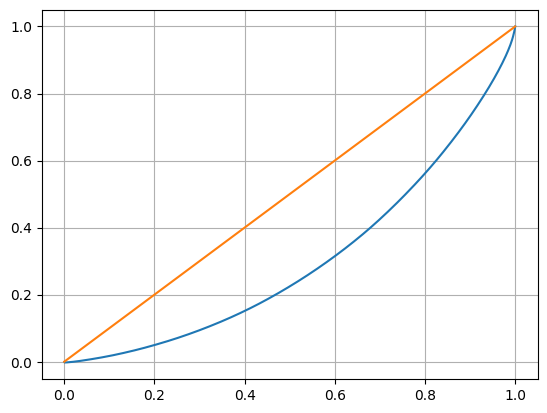

In [119]:
x=np.cumsum([1]*n)/n
net.sort()
y= np.cumsum(net)/ninc
#print(x,y)
x1=[0,1]
y1=[0,1]
plt.plot(x, y)
plt.plot(x1, y1)
plt.grid()
plt.show()

## Conclusion

This is a deliberately simplified model of a tax and benefit system. In reality the UK system (or any other country's) has a bewildering array of taxes, tax bands, benefits and exemptions. But, at least in theory, these can be modelled using similar techniques as the ones described above. And then we can make changes to the model and try to decide whether we think it is a "fairer" or better way of taking money away from some people (taxes) and giving it to others (benefits).
